In [59]:
# import library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import datetime
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

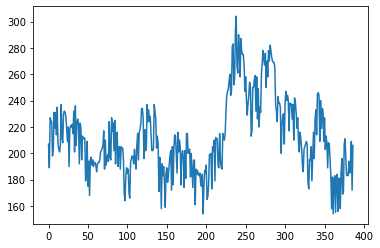

In [60]:
# import data
data = pd.read_csv("./clean_data/integrated_candlesticks3600.csv")
close_price = data['Close']
plt.plot(close_price)
plt.show()

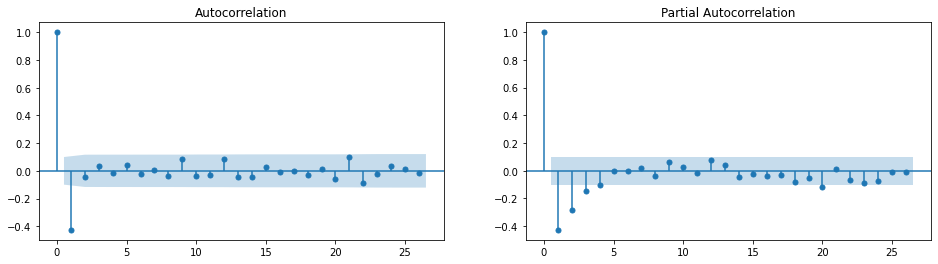

In [61]:
# plot ac and pac of close price
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(close_price.diff().dropna(), ax=ax1);
plot_pacf(close_price.diff().dropna(), ax=ax2);

In [62]:
# train test split
n = 170
# n = int(len(close_price) * 0.6) + 80
train = np.array(close_price[:n])
test = np.array(close_price[n:])
print(len(train))

170


In [63]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
# plot_acf(close_price[:n].diff().dropna(), ax=ax1);
# plot_pacf(close_price[:n].diff().dropna(), ax=ax2);

In [64]:
# q estimater 
import statsmodels.api as sm
ac = sm.tsa.acf(close_price[:n].diff().dropna())
ac = np.array(ac)
max_ac_index = np.argsort(-1*np.absolute(ac))
print(max_ac_index[:5]) 
q_estimater = max_ac_index[:5]

# p estimater
pac = sm.tsa.pacf(close_price[:n].diff().dropna())
pac = np.array(pac)
max_pac_index = np.argsort(-1*np.absolute(pac))
print(max_pac_index[:5]) 
p_estimater = max_pac_index[:5]

[0 1 5 4 6]
[ 0  1  2 34  4]


D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\tsa\stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


In [49]:
# auto arima
model_1 = auto_arima(train, trace=False,
                   start_p=0, d=None, start_q=0,
                   max_p=20, max_q=20, max_order=None,
                   information_criterion="aic", stepwise=True)
# print(model_1.summary())

In [50]:
# Plot residual errors

# residuals = pd.DataFrame(model_1.resid())
# residuals = residuals[1:] # remove first 

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
# ax1.plot(residuals)
# ax2.hist(residuals, density=True, bins=100)

In [51]:
# plot ac and pac of residual
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
# plot_acf(residuals, ax=ax1, lags=len(train)-10);
# plot_pacf(residuals, ax=ax2, lags=int(len(train)/2)-10);

In [52]:
# import statsmodels.api as sm
# ac = sm.tsa.acf(residuals, nlags=len(train)-10)
# ac = np.array(ac)
# max_ac_index = np.argmin(-1*np.absolute(ac[1:]))
# print(max_ac_index) 

In [53]:
# ac = sm.tsa.pacf(residuals, nlags=int(len(train)/2)-10)
# ac = np.array(ac)
# max_ac_index = np.argsort(-1*np.absolute(ac[1:]))
# print(max_ac_index)

In [54]:
q_estimater = q_estimater[2:]
p_estimater = p_estimater[2:] # top 2

In [55]:
# model 2
model_2 = ARIMA(order=(p_estimater[0], 1, q_estimater[0])).fit(train)
# model 3
model_3 = ARIMA(order=(p_estimater[1], 1, q_estimater[0])).fit(train)
# model 4
model_4 = ARIMA(order=(p_estimater[0], 1, q_estimater[1])).fit(train)
# model 5
model_5 = ARIMA(order=(p_estimater[1], 1, q_estimater[1])).fit(train)
# model 6
model_6 = ARIMA(order=(1, 1, 1)).fit(train)
# model 7
model_7 = ARIMA(order=(p_estimater[0], 1, 0)).fit(train)
# model 8
model_8 = ARIMA(order=(p_estimater[1], 1, 0)).fit(train)
# model 9
model_9 = ARIMA(order=(0, 1, q_estimater[0])).fit(train)
# model 10
model_10 = ARIMA(order=(0, 1, q_estimater[1])).fit(train)

D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Program Files\anaconda3\envs\trader\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


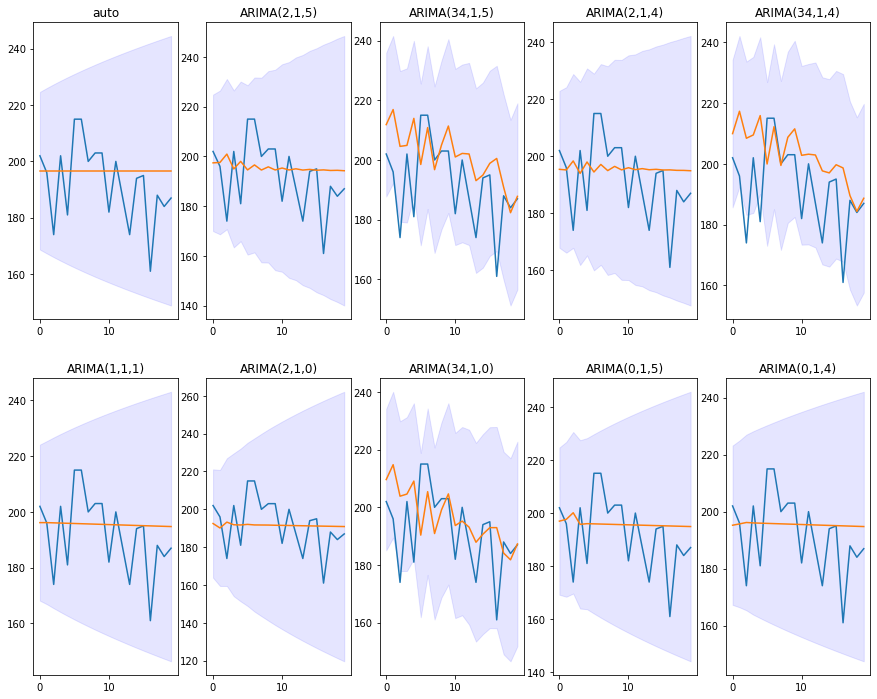

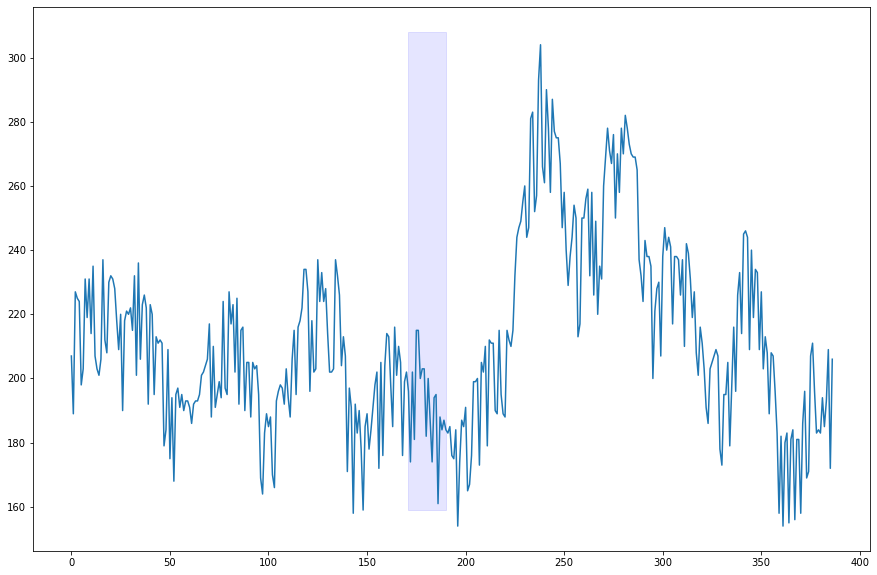

In [56]:
# predict
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]
titles = ['auto', 
          'ARIMA('+str(p_estimater[0])+',1,'+str(q_estimater[0])+')',
          'ARIMA('+str(p_estimater[1])+',1,'+str(q_estimater[0])+')', 
          'ARIMA('+str(p_estimater[0])+',1,'+str(q_estimater[1])+')',
          'ARIMA('+str(p_estimater[1])+',1,'+str(q_estimater[1])+')',
          'ARIMA(1,1,1)',
          'ARIMA('+str(p_estimater[0])+',1,0)',
          'ARIMA('+str(p_estimater[1])+',1,0)',
          'ARIMA(0,1,'+str(q_estimater[0])+')',
          'ARIMA(0,1,'+str(q_estimater[1])+')']
fig, axs = plt.subplots(2, 5, figsize=(15, 12))
n_period=20
x = range(n_period)
preds = []
for i, ax in enumerate(axs.ravel()):
    pred, conf_in = models[i].predict(n_periods=n_period, return_conf_int=True)
    preds.append(pred)
    ax.set(title=titles[i])
    ax.plot(x, test[:n_period])
    ax.plot(x, pred)
    ax.fill_between(x, conf_in[:, 0], conf_in[:, 1], color='b', alpha=.1)
plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
# plt.rcParams.update({'font.size': 10})
plt.plot(close_price)
y=range(min(close_price)+5, max(close_price)+5)
ax.fill_betweenx(y, n+1 ,n+n_period , color='b', alpha=.1)
plt.show()



In [58]:
# evaluation
from sklearn.metrics import mean_squared_error
mse = []
for i in preds:
    mse.append(np.sqrt(mean_squared_error(i, test[:n_period])))
                                          
print(mse)
sort_id = np.argsort(mse)
print(sort_id)

print([titles[i] for i in sort_id[:5] ])

[14.192937216838493, 14.180017336361828, 16.552036144903575, 14.161788816022108, 17.354462365490644, 13.691826123528594, 13.402360231055608, 14.738142842876027, 14.07341192481714, 13.724863466643239]
[6 5 9 8 3 1 0 7 2 4]
['ARIMA(2,1,0)', 'ARIMA(1,1,1)', 'ARIMA(0,1,4)', 'ARIMA(0,1,5)', 'ARIMA(2,1,4)']
